# Exploratory Data Analysis (EDA)

Exploratory data analysis on the Australian Student Performance Data (ASPD24) to understand the dataset, visualize key features, and identify any patterns or anomalies.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

In [5]:
# Load the dataset
data_path = '../data/raw/Australian_Student_PerformanceData (ASPD24).csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,Student ID,University ID,University Name,Age,Gender,Major,Year of Study,GPA,High School GPA,Entrance Exam Score,...,Research Involvement,Internship Experience,Peer Reviews,Academic Advising,Learning Style,Study Environment,Core Course Average,Extracurricular Participation,Peer Evaluations,Performance
0,1,86,University C,25,F,EE,1,2.06,3.50,60,...,0,0,61,5,Visual,Good,51,0,83,Satisfactory
1,2,17,University A,26,F,ME,4,2.12,3.46,52,...,0,1,72,7,Reading/Writing,Excellent,60,0,56,Poor
2,3,52,University C,20,M,CS,4,2.72,3.33,94,...,0,0,79,2,Auditory,Excellent,65,0,52,Satisfactory
3,4,91,University A,25,M,ME,1,3.05,3.54,65,...,1,0,50,7,Kinesthetic,Excellent,58,1,65,Needs Improvement
4,5,33,University C,22,F,CE,3,1.86,3.35,51,...,1,1,68,4,Visual,Poor,62,0,71,Good


In [6]:
# Summary statistics
df.describe(include='all')

,Student ID,University ID,University Name,Age,Gender,Major,Year of Study,GPA,High School GPA,Entrance Exam Score,...,Research Involvement,Internship Experience,Peer Reviews,Academic Advising,Learning Style,Study Environment,Core Course Average,Extracurricular Participation,Peer Evaluations,Performance
count,100256.000000,100256.000000,100256,100256.000000,100256,100256,100256.000000,100256.000000,100256.000000,100256.000000,...,100256.000000,100256.000000,100256.000000,100256.000000,100256,100256,100256.000000,100256.000000,100256.000000,100256
unique,NaN,NaN,3,NaN,2,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,NaN,NaN,5
top,NaN,NaN,University B,NaN,M,ME,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Visual,Poor,NaN,NaN,NaN,Satisfactory
freq,NaN,NaN,33516,NaN,50362,20193,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25241,25279,NaN,NaN,NaN,29968
mean,50128.500000,50.445579,NaN,23.502504,NaN,NaN,2.503960,2.497590,2.995729,74.429052,...,0.499551,0.499781,74.470735,4.494664,NaN,NaN,74.483492,0.500399,74.550411,NaN
std,28941.558631,28.908475,NaN,3.449642,NaN,NaN,1.118541,0.864179,0.578641,14.408504,...,0.500002,0.500002,14.402783,2.872367,NaN,NaN,14.396146,0.500002,14.445583,NaN
min,1.000000,1.000000,NaN,18.000000,NaN,NaN,1.000000,1.000000,2.000000,50.000000,...,0.000000,0.000000,50.000000,0.000000,NaN,NaN,50.000000,0.000000,50.000000,NaN
25%,25064.750000,25.000000,NaN,21.000000,NaN,NaN,2.000000,1.750000,2.490000,62.000000,...,0.000000,0.000000,62.000000,2.000000,NaN,NaN,62.000000,0.000000,62.000000,NaN
50%,50128.500000,50.000000,NaN,24.000000,NaN,NaN,3.000000,2.500000,2.990000,74.000000,...,0.000000,0.000000,74.000000,4.000000,NaN,NaN,74.000000,1.000000,75.000000,NaN
75%,75192.250000,76.000000,NaN,27.000000,NaN,NaN,4.000000,3.240000,3.500000,87.000000,...,1.000000,1.000000,87.000000,7.000000,NaN,NaN,87.000000,1.000000,87.000000,NaN


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Parental Education Level    19966
dtype: int64

Parental Education Level missing for 19 966 entries. (expected)

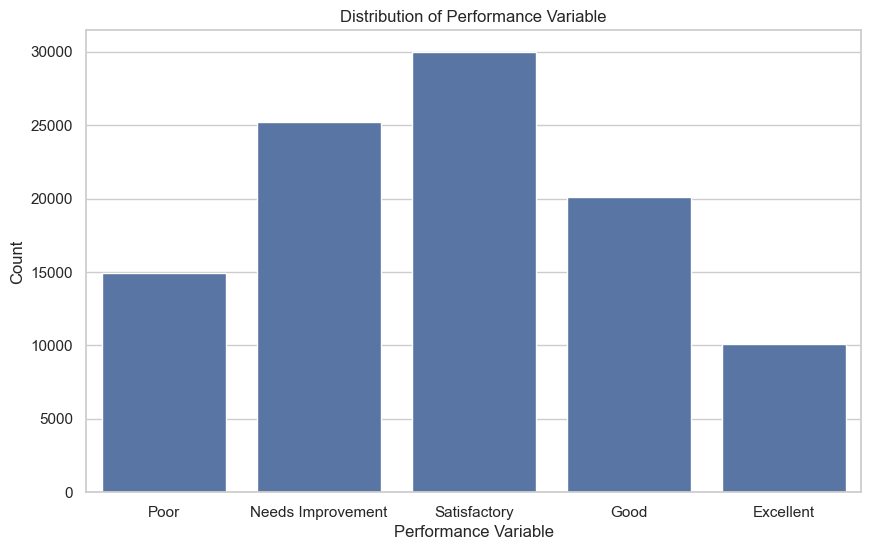

In [8]:
# Visualize the distribution of performance variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Performance', data=df, order=["Poor", "Needs Improvement", "Satisfactory", "Good", "Excellent"])
plt.title('Distribution of Performance Variable')
plt.xlabel('Performance Variable')
plt.ylabel('Count')
plt.show()

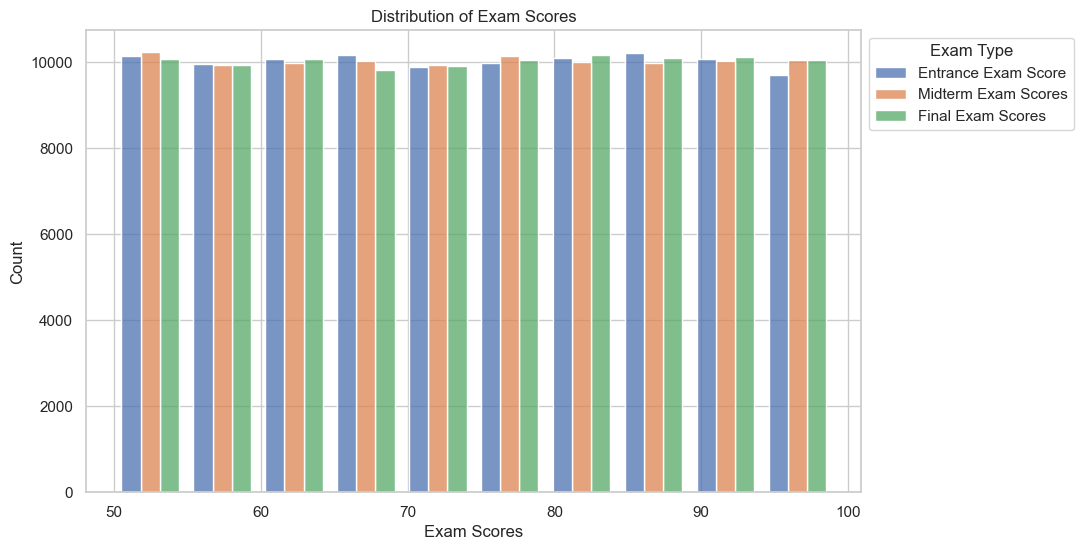

In [9]:
# Visualize the distribution of performance variable
plt.figure(figsize=(10, 6))
df_long = df[["Entrance Exam Score", "Midterm Exam Scores", "Final Exam Scores"]].melt(
    var_name="Exam Type",
    value_name="value"
)

ax = sns.histplot(
    data=df_long,
    x="value",
    hue="Exam Type",
    multiple="dodge",
    shrink=0.8,
    bins=10,
    legend=True
)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Scores')
plt.ylabel('Count')
ax.get_legend().set_bbox_to_anchor((1, 1))

plt.show()

[np.float64(0.011163478552574132), np.float64(0.011099692667258035), np.float64(0.01313187688228299), np.float64(0.012621079753479642), np.float64(0.011507963625629173), np.float64(0.011037373061241428), np.float64(0.012229724059171219), np.float64(0.014235442218728193), np.float64(0.01166353486859071), np.float64(0.01214315980931181), np.float64(0.014504961778684287), np.float64(0.011625242708640206), np.float64(0.011404911978058471), np.float64(0.011928340599604379), np.float64(0.013034495908156125), np.float64(0.011023930810159798), np.float64(0.01345035755388146), np.float64(0.01271586316095698), np.float64(0.011840293065290395), np.float64(0.012320297160993036), np.float64(0.012726784919365797), np.float64(0.010599529748509707), np.float64(0.013621665492976455), np.float64(0.010821314528572266), np.float64(0.01209423431342443), np.float64(0.012592106674262752), np.float64(0.011837366521156452), np.float64(0.011076066011190547), np.float64(0.012155146976697867), np.float64(0.012487

<Axes: >

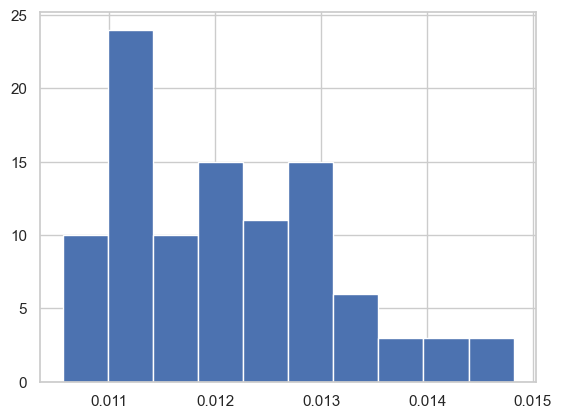

In [10]:
np.random.seed(seed=1)

# Correlation heatmap
df_numeric = pd.get_dummies(df)

n = 100
test_stats = []
for i in range(n):
    print(f"{round(i/n*100)}%", end="\r")

    permuted_data = df_numeric.copy(deep=True)
    for col in permuted_data.columns:
        np.random.shuffle(permuted_data[col].values)
    
    corr = permuted_data.corr()
    corr.values[np.triu_indices_from(corr, 0)] = np.nan
    stat = corr.stack().abs().max()
    test_stats.append(stat)

print(test_stats)
pd.Series(test_stats).hist(bins=10)


In [11]:
def get_prefix(var):
    # Returns the part before first underscore if present, else the full var
    return var.split('_')[0] if '_' in var else var

In [12]:
np.random.seed(seed=1)

test_stats.sort(reverse=True)
# threshold = test_stats[0]
threshold = 0.0095
print(f'Threshold: {threshold}')

corr = df_numeric.corr()
corr.values[np.triu_indices_from(corr, 0)] = np.nan

corr_stacked = corr.stack()
for ((attr1, attr2), _) in corr_stacked.items():
    if get_prefix(attr1) == get_prefix(attr2):
        corr_stacked[(attr1, attr2)] = 0

filtered_corr = corr_stacked[abs(corr_stacked) > threshold]
filtered_corr = filtered_corr.sort_values(ascending=False)

for attr_pair, val in filtered_corr.items():
    print(f'Attributes {attr_pair[0]} and {attr_pair[1]} are correlated with correlation {val:.4f}')

Threshold: 0.0095
Attributes University Name_University B and University ID are correlated with correlation 0.0097
Attributes Parental Education Level_Doctorate and University ID are correlated with correlation 0.0096
Attributes Health Condition_Fair and Participation in Extracurricular Activities are correlated with correlation -0.0096
Attributes Language Proficiency_Good and Internship Experience are correlated with correlation -0.0104
Attributes Performance_Needs Improvement and Mental Health Status_Poor are correlated with correlation -0.0105
Attributes Performance_Excellent and Language Proficiency_Excellent are correlated with correlation -0.0111


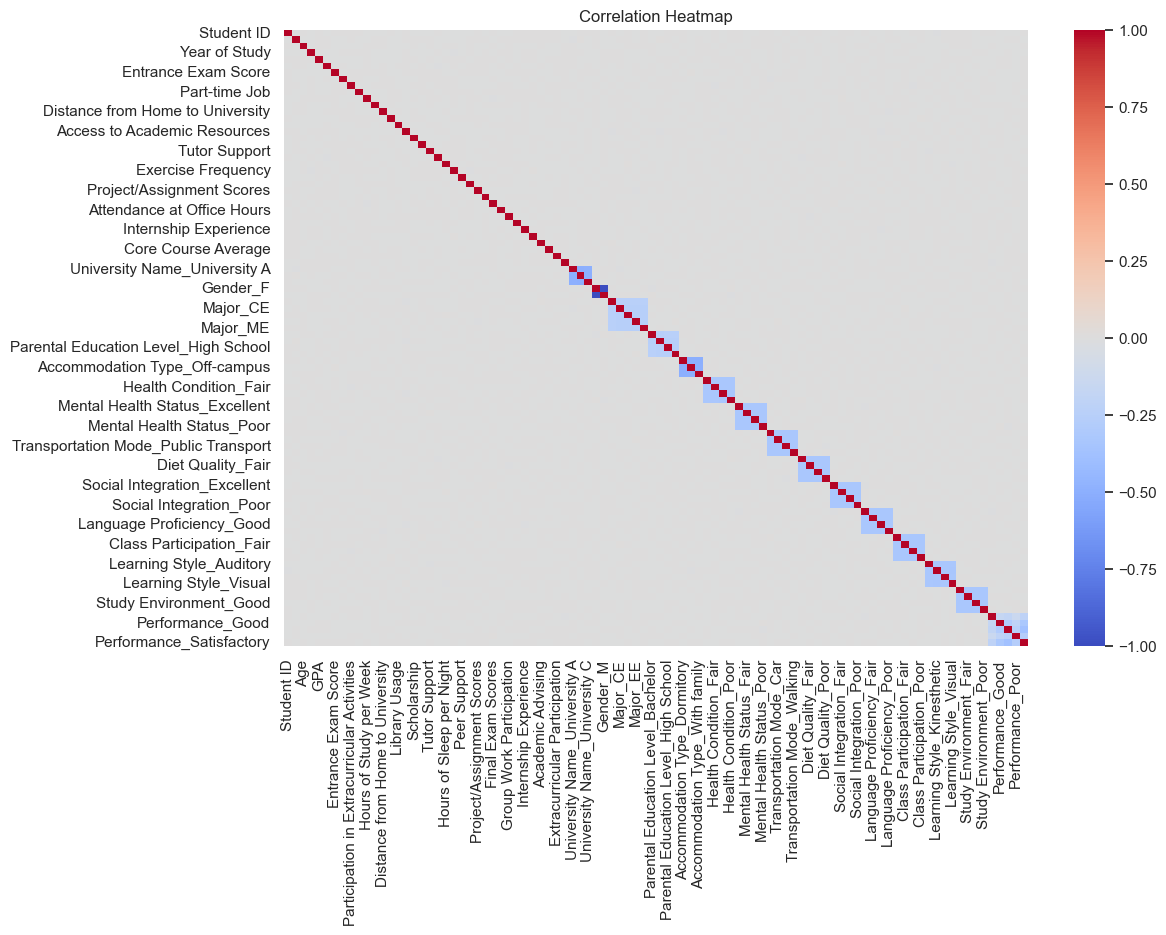

In [13]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

No realy strong correlations found.